In [1]:
import numpy as np
import matplotlib.pyplot as plt

from traffic_signaling.city_plan import *
from traffic_signaling.data import *
from traffic_signaling.simulation import *

In [2]:
def car_summary(plan):
    path_durations = np.array([car.path_duration() for car in plan.cars])
    paths_in_time = path_durations[path_durations <= plan.duration]

    print('Cars that can finish in time: '
          f'{len(paths_in_time)}/{len(plan.cars)} '
          f'({100 * len(paths_in_time) / len(plan.cars):.2f}%)')

In [3]:
def intersection_summary(plan):
    num_used = len(plan.used_intersections())

    # Intersections with non-trivial schedule
    num_non_trivial = len(plan.non_trivial_intersections())
    nun_one_street_used = num_used - num_non_trivial

    print('Intersections used: '
          f'{num_used}/{len(plan.intersections)} '
          f'({100 * num_used / len(plan.intersections):.2f}%)')
    print('Intersections with exactly one street used: '
          f'{nun_one_street_used}/{len(plan.intersections)} '
          f'({100 * nun_one_street_used / len(plan.intersections):.2f}%)')
    print('Intersections with non-trivial schedule: '
          f'{num_non_trivial}/{len(plan.intersections)} '
          f'({100 * num_non_trivial / len(plan.intersections):.2f}%)')

In [4]:
def street_summary(plan):
    used_streets = [street for street in plan.streets if street.used]
    used_streets = sum(
        len(intersection.used_streets) for intersection in plan.intersections
    )
    non_trivial_used_streets = sum(
        len(intersection.used_streets) for intersection in plan.non_trivial_intersections()
    )
    print('Used streets: '
          f'{used_streets}/{len(plan.streets)} '
          f'({100 * used_streets / len(plan.streets):.2f}%)')

    print('Used streets in non-trivial intersections: '
          f'{non_trivial_used_streets}/{len(plan.streets)} '
          f'({100 * non_trivial_used_streets / len(plan.streets):.2f}%)')

    # 2x because order and times
    print(f'NUMBER OF PARAMETERS: {2 * non_trivial_used_streets}')

In [5]:
def car_histogram(plan):
    # used streets from intersections with non-trivial schedule
    streets = plan.streets
    used_street_ids = []
    car_counts = []
    for i in plan.non_trivial_intersections():
        for s in i.used_streets:
            used_street_ids.append(s.id)
            car_counts.append(s.total_cars)

    values, counts = np.unique(car_counts, return_counts=True)
    values = values.astype(int)

    plt.bar(values, counts)
    plt.title('Number of cars passing through a street')
    plt.xlabel('Cars passing through')
    plt.ylabel('Number of streets')
    plt.show()

    print(f'Values: {values}')
    print(f'Counts: {counts}')

    initial_cars = np.zeros(len(streets))
    for c in plan.cars:
        initial_cars[c.path[0].id] += 1

    values, counts = np.unique(initial_cars[used_street_ids], return_counts=True)
    values = values.astype(int)

    plt.bar(values, counts, color='red')
    plt.title('Number of queueing cars in a street at the beginning')
    plt.xlabel('Queueing cars')
    plt.ylabel('Number of streets')
    plt.show()

    print(f'Values: {values}')
    print(f'Counts: {counts}')
    print(f'Total cars (non-trivial intersections): {values @ counts}')

In [6]:
def street_histogram(plan, xscale='linear'):
    non_trivial_incoming_counts = [
        len(i.used_streets) for i in plan.non_trivial_intersections()
    ]
    values, counts = np.unique(non_trivial_incoming_counts, return_counts=True)
    values = values.astype(int)

    plt.bar(values, counts, color='green')
    plt.xscale(xscale)
    #plt.xticks(values, values)
    #plt.yticks(counts, counts)
    plt.title('Number of used incoming streets to a non-trivial intersection')
    plt.xlabel('Used incoming streets')
    plt.ylabel('Non-trivial intersections')
    plt.show()

    print(f'Values: {values}')
    print(f'Counts: {counts}')

------------------------------- DATA a -------------------------------
Intersections used: 3/4 (75.00%)
Intersections with exactly one street used: 2/4 (50.00%)
Intersections with non-trivial schedule: 1/4 (25.00%)
Used streets: 4/5 (80.00%)
Used streets in non-trivial intersections: 2/5 (40.00%)
NUMBER OF PARAMETERS: 4
Cars that can finish in time: 2/2 (100.00%)
Default score: 1,001
Max known score: 2,002
Upper bound of the score: 2,002
----------------------------------------------------------------------
------------------------------- DATA b -------------------------------
Intersections used: 6296/7073 (89.01%)
Intersections with exactly one street used: 4977/7073 (70.37%)
Intersections with non-trivial schedule: 1319/7073 (18.65%)
Used streets: 7964/9102 (87.50%)
Used streets in non-trivial intersections: 2987/9102 (32.82%)
NUMBER OF PARAMETERS: 5974
Cars that can finish in time: 1000/1000 (100.00%)
Default score: 4,566,576
Max known score: 4,570,431
Upper bound of the score: 4,57

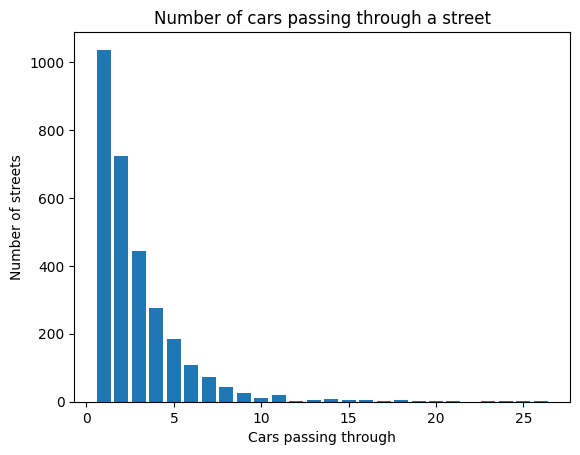

Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
 26]
Counts: [1036  724  444  276  184  107   72   43   27   12   20    2    5    9
    6    5    2    4    2    2    1    1    1    1    1]


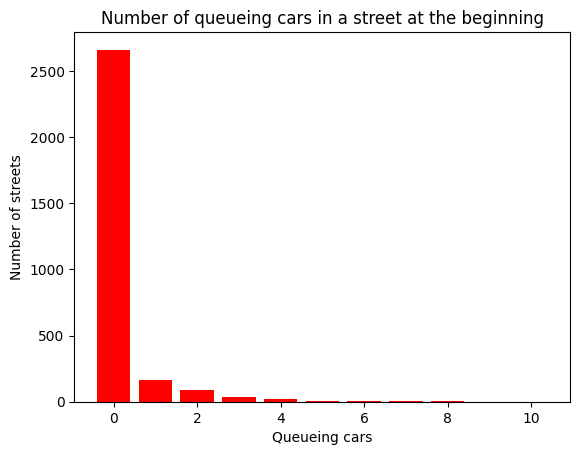

Values: [ 0  1  2  3  4  5  6  7  8 10]
Counts: [2661  161   89   39   19    9    2    3    3    1]
Total cars (non-trivial intersections): 644


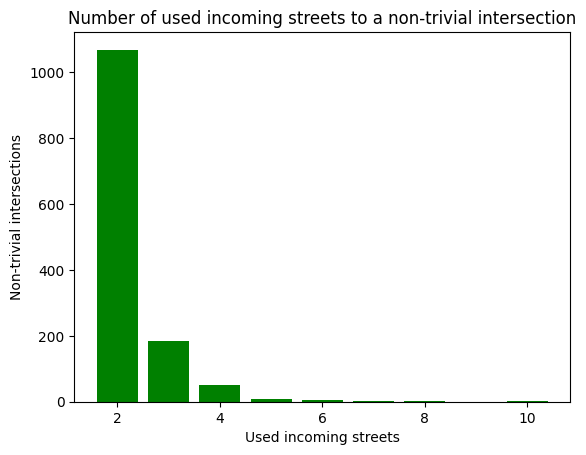

Values: [ 2  3  4  5  6  7  8 10]
Counts: [1068  185   50    8    4    2    1    1]
------------------------------- DATA c -------------------------------
Intersections used: 7660/10000 (76.60%)
Intersections with exactly one street used: 4468/10000 (44.68%)
Intersections with non-trivial schedule: 3192/10000 (31.92%)
Used streets: 11472/35030 (32.75%)
Used streets in non-trivial intersections: 7004/35030 (19.99%)
NUMBER OF PARAMETERS: 14008
Cars that can finish in time: 1000/1000 (100.00%)
Default score: 1,299,357
Max known score: 1,315,372
Upper bound of the score: 1,328,389
----------------------------------------------------------------------


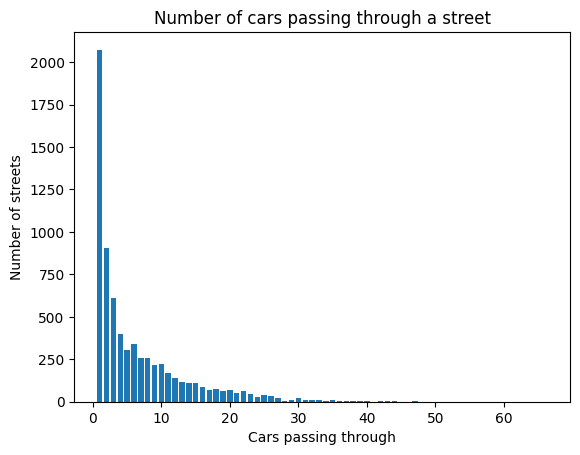

Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 49 50 53
 57 65 66]
Counts: [2073  903  611  399  306  341  257  259  214  221  167  141  119  112
  108   85   69   77   65   70   51   64   47   25   40   31   24    7
   11   20   10   12   10    5    8    2    7    6    2    2    1    5
    3    2    6    1    1    1    1    1    1]


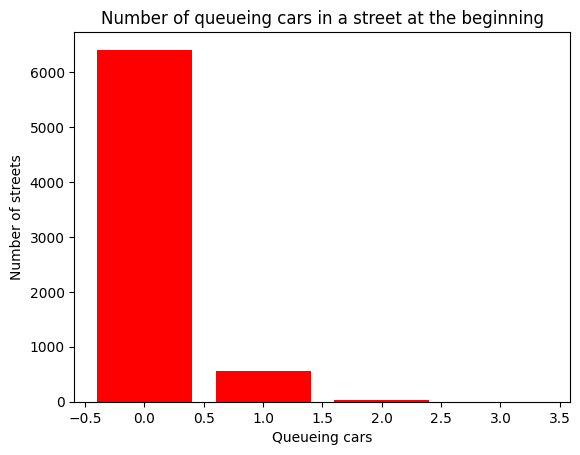

Values: [0 1 2 3]
Counts: [6407  563   32    2]
Total cars (non-trivial intersections): 633


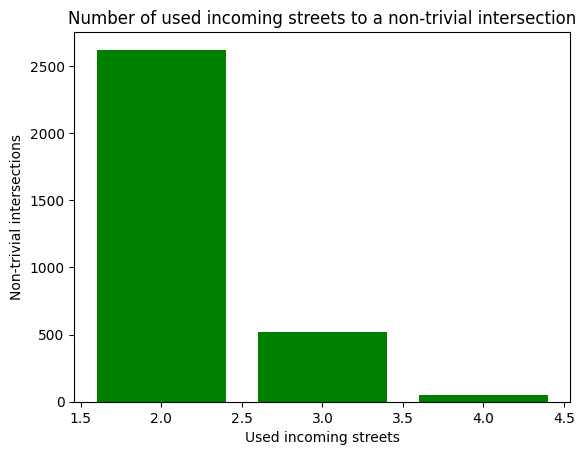

Values: [2 3 4]
Counts: [2621  522   49]
------------------------------- DATA d -------------------------------
Intersections used: 8000/8000 (100.00%)
Intersections with exactly one street used: 0/8000 (0.00%)
Intersections with non-trivial schedule: 8000/8000 (100.00%)
Used streets: 83874/95928 (87.43%)
Used streets in non-trivial intersections: 83874/95928 (87.43%)
NUMBER OF PARAMETERS: 167748
Cars that can finish in time: 1000/1000 (100.00%)
Default score: 1,573,100
Max known score: 2,610,027
Upper bound of the score: 3,986,591
----------------------------------------------------------------------


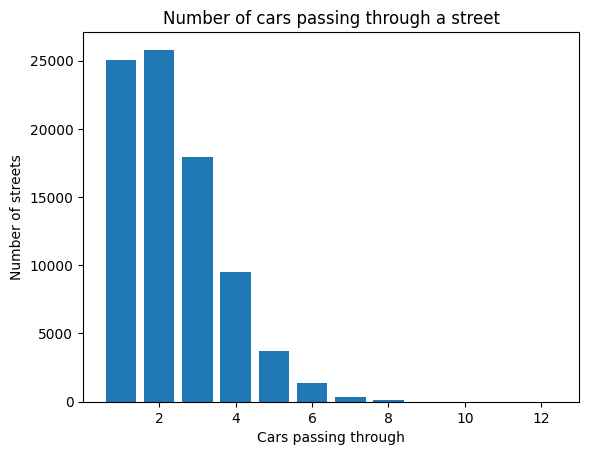

Values: [ 1  2  3  4  5  6  7  8  9 10 12]
Counts: [25067 25796 17904  9478  3743  1373   377   111    15     9     1]


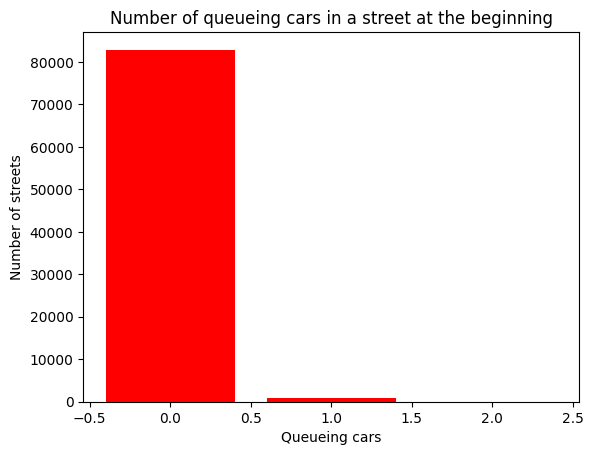

Values: [0 1 2]
Counts: [82884   980    10]
Total cars (non-trivial intersections): 1000


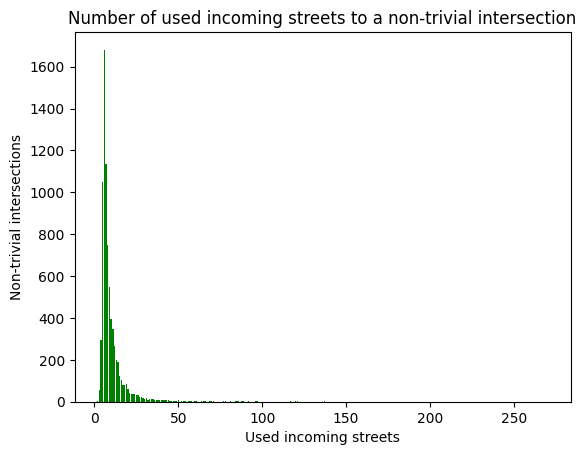

Values: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  77  78  79  81  82  84  85  86  88  89  92  93  96  97  98 100 107 109
 115 117 118 120 121 132 137 145 147 158 169 173 177 180 188 200 235 240
 268 270]
Counts: [   4   56  293 1048 1681 1137  747  550  396  345  265  200  190  122
  102   82   79   86   59   42   35   38   36   33   33   23   23   20
   14   17   10   15   11   14   10    7    7    7    9    6    8    7
    6    5    4    3    4    3    6    1    2    2    5    1    2    2
    2    1    4    3    1    1    2    3    3    1    3    2    2    1
    1    1    2    3    1    2    1    2    2    2    2    2    2    1
    2    2    1    1    1    1    1    2    1    3    3    1    2    1
    1    1    1    1    1    1    1    

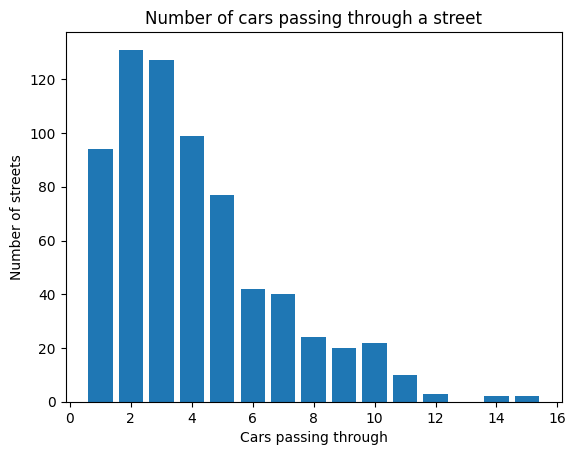

Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]
Counts: [ 94 131 127  99  77  42  40  24  20  22  10   3   2   2]


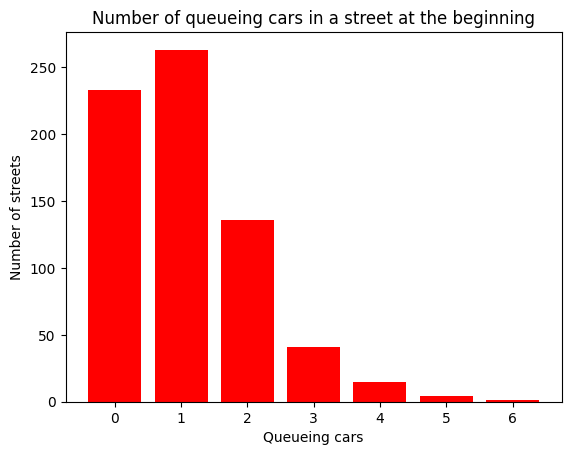

Values: [0 1 2 3 4 5 6]
Counts: [233 263 136  41  15   4   1]
Total cars (non-trivial intersections): 744


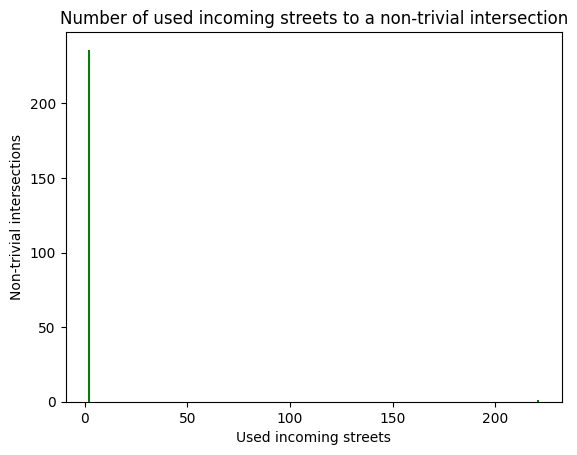

Values: [  2 221]
Counts: [236   1]
------------------------------- DATA f -------------------------------
Intersections used: 1632/1662 (98.19%)
Intersections with exactly one street used: 332/1662 (19.98%)
Intersections with non-trivial schedule: 1300/1662 (78.22%)
Used streets: 5333/10000 (53.33%)
Used streets in non-trivial intersections: 5001/10000 (50.01%)
NUMBER OF PARAMETERS: 10002
Cars that can finish in time: 1000/1000 (100.00%)
Default score: 819,083
Max known score: 1,480,489
Upper bound of the score: 1,765,068
----------------------------------------------------------------------


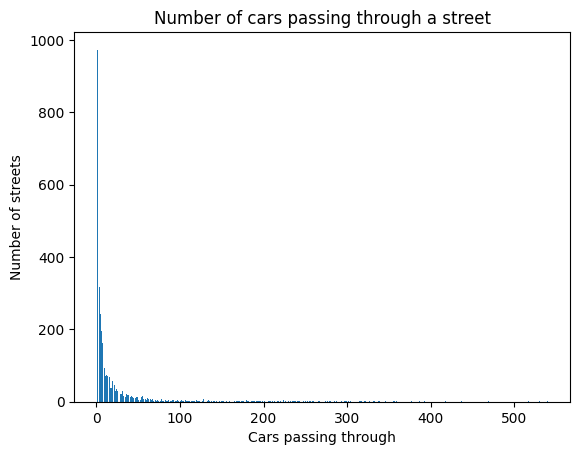

Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 127 128 130
 131 133 134 135 136 137 138 140 141 143 144 147 148 149 150 151 152 155
 156 159 161 165 166 167 168 169 170 171 172 173 174 175 176 178 179 180
 181 182 184 185 186 187 188 189 190 192 193 194 195 196 197 198 199 201
 203 204 206 207 208 209 210 211 213 215 216 217 218 220 221 224 226 228
 230 232 234 235 236 237 238 239 241 242 243 245 246 248 250 251 252 253
 255 256 259 260 263 264 266 267 269 270 274 275 276 277 279 280 285 287
 288 289 293 294 297 298 299 300 301 302 30

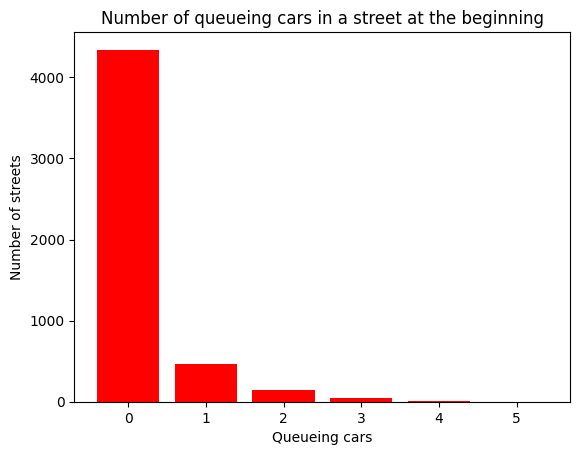

Values: [0 1 2 3 4 5]
Counts: [4340  465  150   40    5    1]
Total cars (non-trivial intersections): 910


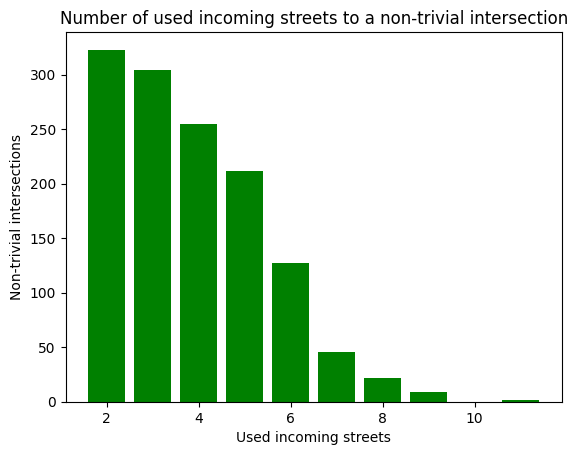

Values: [ 2  3  4  5  6  7  8  9 11]
Counts: [323 304 255 212 127  46  22   9   2]
TOTAL DEFAULT SCORE:	   8,943,886
TOTAL MAX KNOWN SCORE:	  10,757,600
TOTAL UPPER BOUND:	  12,579,455


In [7]:
for data in TEST_DATA:
    plan = CityPlan(get_data_filename(data))
    print(f'{"-" * 31} DATA {data} {"-" * 31}')
    intersection_summary(plan)
    street_summary(plan)
    car_summary(plan)
    print(f'Default score: {DEFAULT_SCORE[data]:,}')
    print(f'Max known score: {MAX_KNOWN_SCORE[data]:,}')
    print(f'Upper bound of the score: {UPPER_BOUND[data]:,}')
    print('-' * 70)
    if data != 'a':
        car_histogram(plan)
        #if data == 'e':
        #    street_histogram(plan, xscale='log')
        #else:
        #    street_histogram(plan)
        street_histogram(plan)

print(f'TOTAL DEFAULT SCORE:\t{sum(DEFAULT_SCORE.values()):12,}')
print(f'TOTAL MAX KNOWN SCORE:\t{sum(MAX_KNOWN_SCORE.values()):12,}')
print(f'TOTAL UPPER BOUND:\t{sum(UPPER_BOUND.values()):12,}')

##### Test redirected output from C++ to Jupyter notebook

In [8]:
filename = get_data_filename('b')
city_plan = CityPlan(filename)
simulation = Simulation(city_plan)
simulation.default_schedules()
score = simulation.score()
simulation.summary()
print(f'SCORE: {score:,}')

The submission scored **4,566,576 points**. This is the sum of 1,000,000 bonus points for cars arriving before the deadline (1,000 points each) and 3,566,576 points for early arrival times.

1,000 of 1,000 cars arrived before the deadline (100.00%). The earliest car (ID 492) arrived at its destination after 5,045 seconds scoring 1,025 points, whereas the last car (ID 546) arrived at its destination after 35 seconds scoring 6,035 points. Cars that arrived within the deadline drove for an average of 1,503.42 seconds to arrive at their destination.
SCORE: 4,566,576
